<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/ANN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ANN Class and code

In [1]:
import torch
import torch.nn as nn
import numpy as np

import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

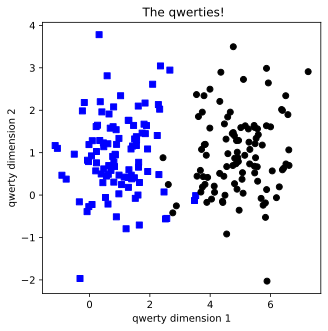

In [2]:
# Create data
nPerClust = 100
blur = 1

A= [1, 1]
B= [5, 1]

# Generate Data
a = [ A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [ B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

# True labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# Concatenate into matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize= (5, 5))
plt.plot(data[np.where(labels== 0)[0], 0], data[np.where(labels== 0)[0], 1], 'bs')
plt.plot(data[np.where(labels== 1)[0], 0], data[np.where(labels== 1)[0], 1], 'ko')
plt.title(' The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print()
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)

<class 'torch.Tensor'>
torch.Size([200, 2])


In [4]:
# build the model

ANNClassify0 = nn.Sequential(
    nn.Linear(2, 1),    # input layer
    nn.ReLU(),          # Activation function
    nn.Linear(1, 1),    # output unit
    nn.Sigmoid(),       # Final activation unit    
)

In [11]:
# Define a class

class theClass4ANN(nn.Module):
    def __init__(self):
        super().__init__()

        # input layer
        self.input = nn.Linear(2, 1)

        # output layer
        self.output = nn.Linear(1, 1)

    # Forward Pass
    def forward(self, x):
        # pass through the input layer
        x = self.input(x)

        # apply relu
        x = F.relu( x )

        # output layer
        x= self.output(x)
        x= torch.sigmoid(x)
        return x

# Create an instance of the class
ANNClassify = theClass4ANN()

In [12]:
# The other model features

learningRate = 0.01

# loss function
lossfun = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(ANNClassify.parameters(), lr= learningRate)

In [13]:
# Train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNClassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

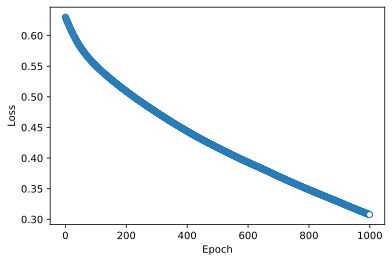

In [14]:
# Show the losses

plt.plot(losses.detach(), 'o', markerfacecolor= 'w', linewidth= 0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
# Compute the predictions

# Manually compute the losses
# final forward pass

predictions = ANNClassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total Accuracy
totalacc = 100 - 100* len(misclassified)/ (2*nPerClust)

print('Final accuracy : %g%%' %totalacc)

Final accuracy : 93%


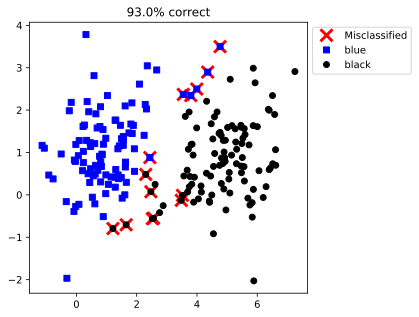

In [16]:
# plot the labeled data
fig = plt.figure(figsize= (5,5 ))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize= 12, markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0], 1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor= (1,1))
plt.title(f'{totalacc}% correct')
plt.show()

### Depth vs Breadth (width)

**Import and Organize the data**

In [ ]:
import torch
import torch.nn as nn
import numpy as np

import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [17]:
# import dataset

import seaborn as sns
iris = sns.load_dataset('iris')

In [19]:
# convert data from pandaas dataframe to number

data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transfomr species to number

labels = torch.zeros(len(data), dtype= torch.long)

# labels [iris.species=='setosa'] = 0   # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [25]:
# create a class for model 

class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()

        # create dictionary to store layers
        self.layers = nn.ModuleDict()
        self.nLayers =  nLayers # nUnits

        # input layer
        self.layers['input'] = nn.Linear(4, nUnits)

        # Hidden layers
        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

        # output layer
        self.layers['output'] = nn.Linear(nUnits, 3)
    
    # forward pass
    def forward(self, x):
        # input layer
        x = self.layers['input'](x)

        # hidden layers
        for i in range(self.nLayers):
            x = F.relu(self.layers[f'hidden{i}'] (x))

        # return output layer
        x = self.layers['output'](x)
        return x

In [26]:
# generate an instance of the model and inspect it

nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer, nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [27]:
# a quick test of running some numbers through the model
# This simply ensures that the architecture is internally consistent

# 10 samples , 4 dimensions
tmpx = torch.randn(10, 4)

# run it through the DL
y = net(tmpx)

# exam the shape of the output
print(y.shape), print()
print(y)

torch.Size([10, 3])

tensor([[ 0.0459,  0.0497, -0.0658],
        [ 0.0435,  0.0505, -0.0650],
        [ 0.0424,  0.0492, -0.0643],
        [ 0.0505,  0.0493, -0.0710],
        [ 0.0451,  0.0492, -0.0680],
        [ 0.0447,  0.0505, -0.0659],
        [ 0.0471,  0.0519, -0.0670],
        [ 0.0425,  0.0502, -0.0635],
        [ 0.0419,  0.0497, -0.0635],
        [ 0.0529,  0.0540, -0.0711]], grad_fn=<AddmmBackward0>)
